In [1]:
#Importamos las librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta
import seaborn as sns
sns.set(style="whitegrid")
from sklearn.model_selection import train_test_split, cross_val_score
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Leemos el archivo de dataset
df = pd.read_excel('C:/Users/mvalzania/Documents/Maestria UTP/Modelos Predictivos/Proyecto Final/Modelo Predictivo/dataset/data.xlsx')

In [3]:
#Vemos el archivo
df.head()
df_graficas = df.copy()
df_modelo = df.copy()

I.II. Coversión de Datos.
Convertimos los datos en el formato adecuado para su análisis.

In [4]:
#Vemos la Información de las Columnas con sus tipos de datos.
print("Información de las columnas y tipos de datos:")
print(df.info())
print("\n")

Información de las columnas y tipos de datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Order No           5000 non-null   object        
 1   Order Date         5000 non-null   datetime64[ns]
 2   Customer Name      5000 non-null   object        
 3   Address            4999 non-null   object        
 4   City               5000 non-null   object        
 5   State              5000 non-null   object        
 6   Customer Type      5000 non-null   object        
 7   Account Manager    5000 non-null   object        
 8   Order Priority     5000 non-null   object        
 9   Product Name       5000 non-null   object        
 10  Product Category   5000 non-null   object        
 11  Product Container  5000 non-null   object        
 12  Ship Mode          5000 non-null   object        
 13  Ship Date        

In [5]:
#Convierto la columna Discount de int64 a float64
df['Discount'] = df['Discount'].astype('float64')

In [6]:
# Convertir fechas 
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

I.III. Verificamos los valores Nulos
Se verifican los valores nulos en Dataset

In [7]:
# Verificar valores nulos
print("Valores nulos por columna:")
nulls = df.isnull().sum()
print(nulls)

Valores nulos por columna:
Order No             0
Order Date           0
Customer Name        0
Address              1
City                 0
State                0
Customer Type        0
Account Manager      0
Order Priority       0
Product Name         0
Product Category     0
Product Container    0
Ship Mode            0
Ship Date            0
Cost Price           0
Retail Price         0
Profit Margin        0
Order Quantity       1
Sub Total            0
Discount             0
Total Discount       0
Order Total          0
Shipping Cost        0
Total                0
dtype: int64


Tenemos 2 valores nulos dentro del dataset, en esto caso es para la dirección (Address) y para la cantidad de un pedido (Order Quantity). En estos casos, como los registros son minimos y no resultan significativos para el análisis vamos a eliminarlos.

In [8]:
#Voy a eliminar ambos registros debido a que son minimos y no es significativo en el análisis

df.dropna(subset=['Order Quantity'], inplace=True)
df.dropna(subset=['Address'], inplace=True)

In [9]:
# Verifico por última vez los valores nulos
print("Valores nulos por columna:")
nulls = df.isnull().sum()
print(nulls)

Valores nulos por columna:
Order No             0
Order Date           0
Customer Name        0
Address              0
City                 0
State                0
Customer Type        0
Account Manager      0
Order Priority       0
Product Name         0
Product Category     0
Product Container    0
Ship Mode            0
Ship Date            0
Cost Price           0
Retail Price         0
Profit Margin        0
Order Quantity       0
Sub Total            0
Discount             0
Total Discount       0
Order Total          0
Shipping Cost        0
Total                0
dtype: int64


Excelente, ahora vamos a seguir con los valores duplicados.

I.IV. Validación de Registros Duplicados

In [10]:
# Verificar duplicados
print(f"Número de filas duplicadas: {df.duplicated().sum()}")
print("\n")

Número de filas duplicadas: 0




II. Estadistica Descriptiva y Gráficos

In [11]:
# Creamos las columnas de periodo, mes
df['periodo'] = df['Order Date'].dt.year
df['mes'] = df['Order Date'].dt.month
df['periodo_mes'] = df['Order Date'].dt.strftime('%Y-%m')


Ventas totales por año:
   periodo      Total
0     2013  766873.10
1     2014  992586.20
2     2015  995253.41
3     2016  890547.37
4     2017   76572.55


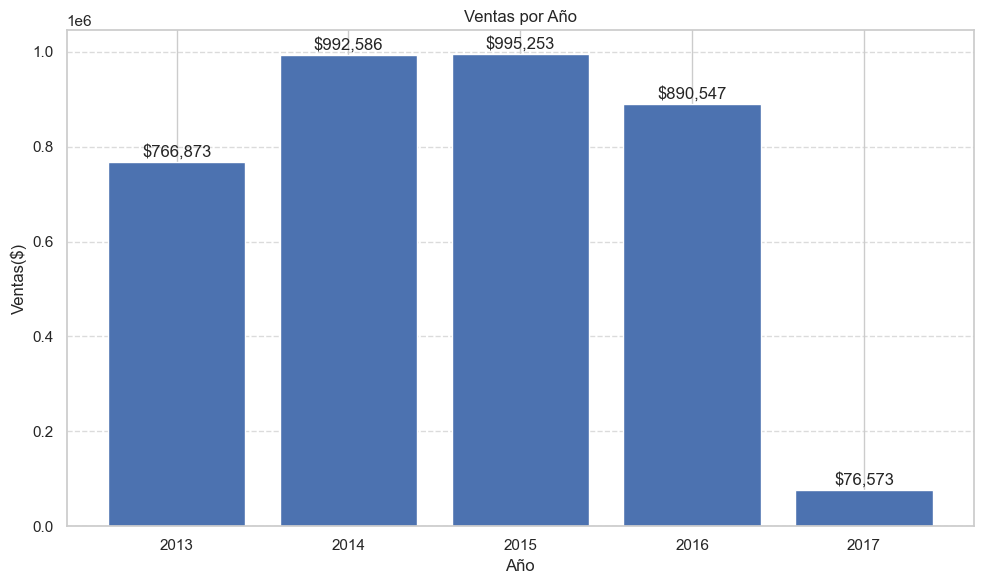

In [12]:
# Ventas por año
ventas_anuales = df.groupby('periodo')['Total'].sum().reset_index()
print("\nVentas totales por año:")
print(ventas_anuales)

plt.figure(figsize=(10, 6))
bars = plt.bar(ventas_anuales['periodo'].astype(str), ventas_anuales['Total'])
plt.title('Ventas por Año')
plt.xlabel('Año')
plt.ylabel('Ventas($)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Agregar etiquetas de texto encima de cada barra
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 5000,
            f'${height:,.0f}',
            ha='center', va='bottom', rotation=0)

plt.tight_layout()
plt.show()


Ventas por año y mes:
  periodo_mes      Total
0     2013-02   31874.37
1     2013-03   34953.17
2     2013-04   15468.78
3     2013-05  108712.11
4     2013-06  108847.89
5     2013-07  121133.29
6     2013-08   87920.60
7     2013-09   56843.14
8     2013-10   83069.75
9     2013-11   28681.07


<function matplotlib.pyplot.show(close=None, block=None)>

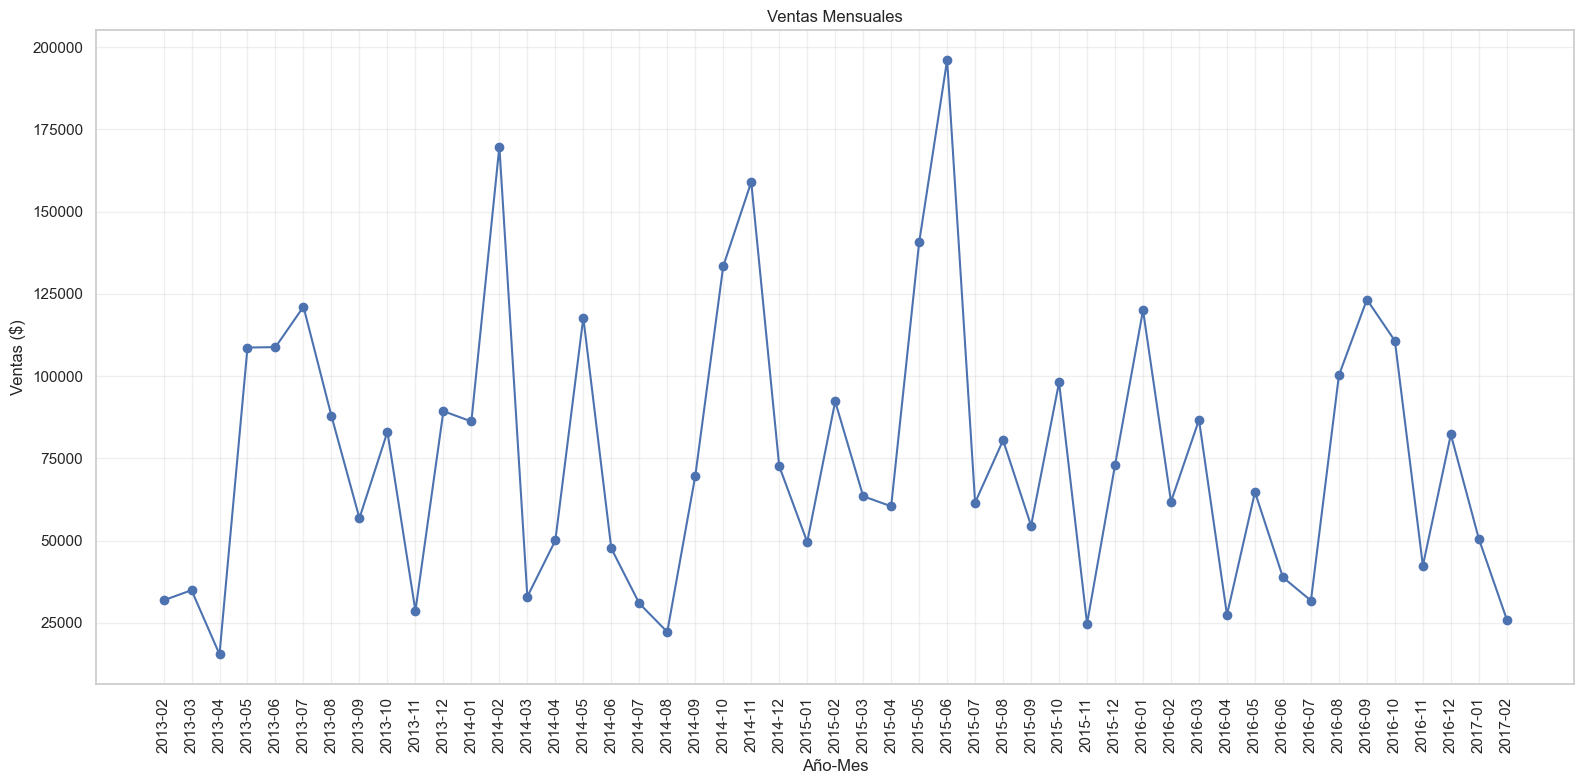

In [13]:
# Ventas por año y mes
ventas_periodo_mes = df.groupby('periodo_mes')['Total'].sum().reset_index()
ventas_periodo_mes = ventas_periodo_mes.sort_values('periodo_mes')
print("\nVentas por año y mes:")
print(ventas_periodo_mes.head(10))

plt.figure(figsize=(16, 8))
plt.plot(ventas_periodo_mes['periodo_mes'], ventas_periodo_mes['Total'], marker='o')
plt.title('Ventas Mensuales')
plt.xlabel('Año-Mes')
plt.ylabel('Ventas ($)')
plt.xticks(rotation=90)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show


Categorías de productos más vendidos:
  Product Category       Total
1  Office Supplies  2917828.03
2       Technology   710496.56
0        Furniture    93508.04


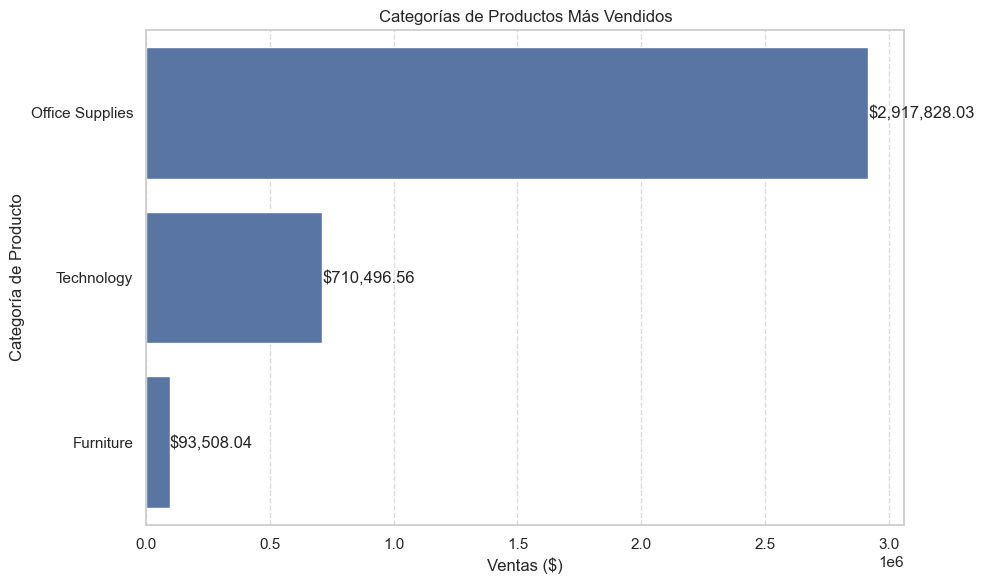

In [14]:
# Categorías más vendidas
categoria_ventas = df.groupby('Product Category')['Total'].sum().reset_index()
categoria_ventas = categoria_ventas.sort_values('Total', ascending=False)
print("\nCategorías de productos más vendidos:")
print(categoria_ventas)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Total', y='Product Category', data=categoria_ventas)
plt.title('Categorías de Productos Más Vendidos')
plt.xlabel('Ventas ($)')
plt.ylabel('Categoría de Producto')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Agregar etiquetas de texto a cada barra
for i, v in enumerate(categoria_ventas['Total']):
    ax.text(v + 1000, i, f'${v:,.2f}', va='center')  # Formato con separadores de miles y 2 decimales

plt.tight_layout()
plt.show()


Productos más vendidos (top 10 por cantidad):
                                          Product Name      Total
131                                 Cando PC940 Copier  695199.82
168                           HFX LaserJet 3310 Copier  432414.11
30                Adesso Programmable 142-Key Keyboard  237575.05
252     UGen Ultra Professional Cordless Optical Suite  201337.72
180                                 Multimedia Mailers  117741.64
249                  UGen Ultra Cordless Optical Suite  111767.25
158                             Economy Rollaway Files  102319.74
161           Emerson Stylus 1520 Color Inkjet Printer   85456.96
247  TypeRight Side-Opening Peel & Seel Expanding E...   80846.92
27                                 600 Series Non-Flip   60530.63


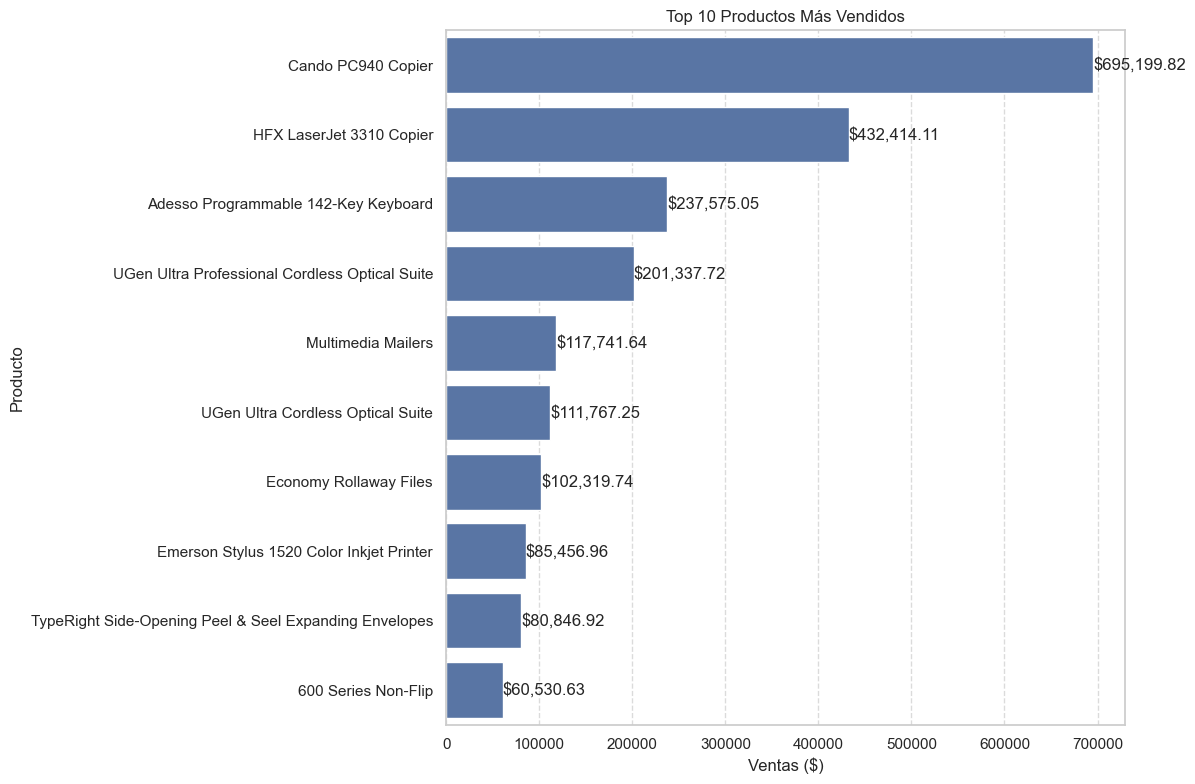

In [15]:
# Productos más vendidos (top 10 por cantidad)
productos_ventas = df.groupby('Product Name')['Total'].sum().reset_index()
productos_ventas = productos_ventas.sort_values('Total', ascending=False).head(10)
print("\nProductos más vendidos (top 10 por cantidad):")
print(productos_ventas)

plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Total', y='Product Name', data=productos_ventas)
plt.title('Top 10 Productos Más Vendidos')
plt.xlabel('Ventas ($)')
plt.ylabel('Producto')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Agregar etiquetas de texto a cada barra
for i, v in enumerate(productos_ventas['Total']):
    ax.text(v + 100, i, f'${v:,.2f}', va='center')  # Formato con separadores de miles y 2 decimales

plt.tight_layout()
plt.show()

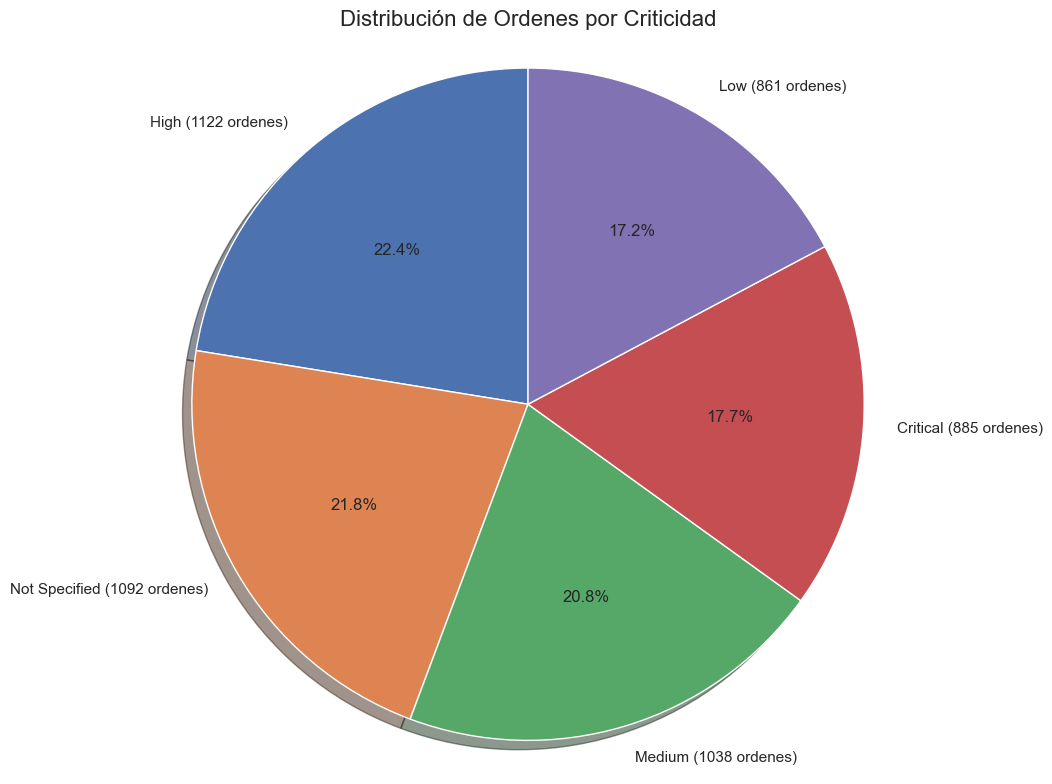

In [16]:
# Contar la cantidad de órdenes por criticidad
ordenes_por_prioridad = df['Order Priority'].value_counts().reset_index()
ordenes_por_prioridad.columns = ['Order Priority', 'Count']

# Crear un gráfico de pastel más simple
plt.figure(figsize=(10, 8))
plt.pie(ordenes_por_prioridad['Count'], 
        labels=[f"{priority} ({count} ordenes)" for priority, count in zip(ordenes_por_prioridad['Order Priority'], ordenes_por_prioridad['Count'])],
        autopct='%1.1f%%',
        startangle=90,
        shadow=True)
plt.title('Distribución de Ordenes por Criticidad', fontsize=16)
plt.axis('equal')
plt.tight_layout()
plt.show()

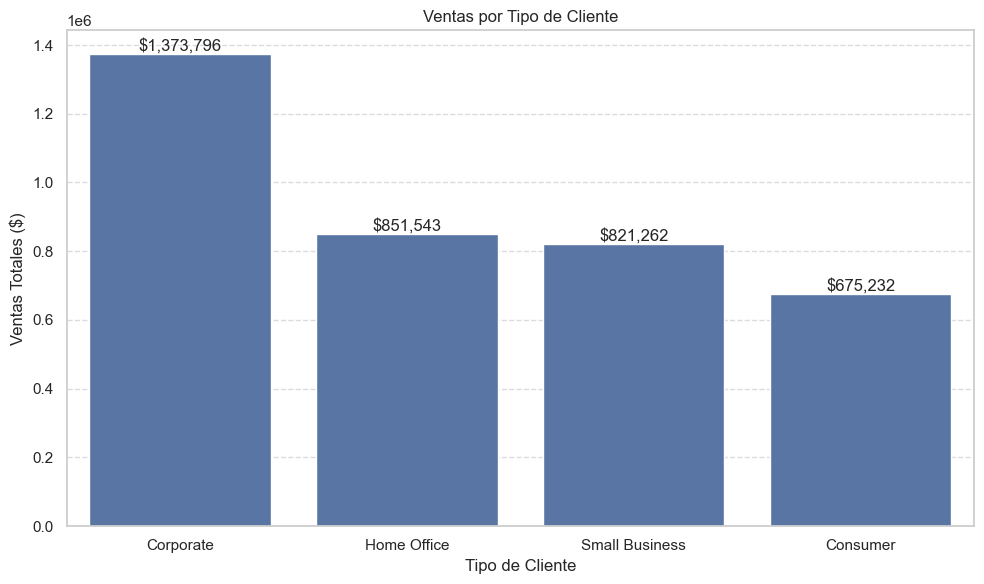

In [17]:
# Ventas por tipo de cliente
ventas_tipo_cliente = df.groupby('Customer Type')['Total'].sum().reset_index()
ventas_tipo_cliente = ventas_tipo_cliente.sort_values('Total', ascending=False)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Customer Type', y='Total', data=ventas_tipo_cliente)
plt.title('Ventas por Tipo de Cliente')
plt.xlabel('Tipo de Cliente')
plt.ylabel('Ventas Totales ($)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Agregar etiquetas
for i, v in enumerate(ventas_tipo_cliente['Total']):
    ax.text(i, v + 1000, f'${v:,.0f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


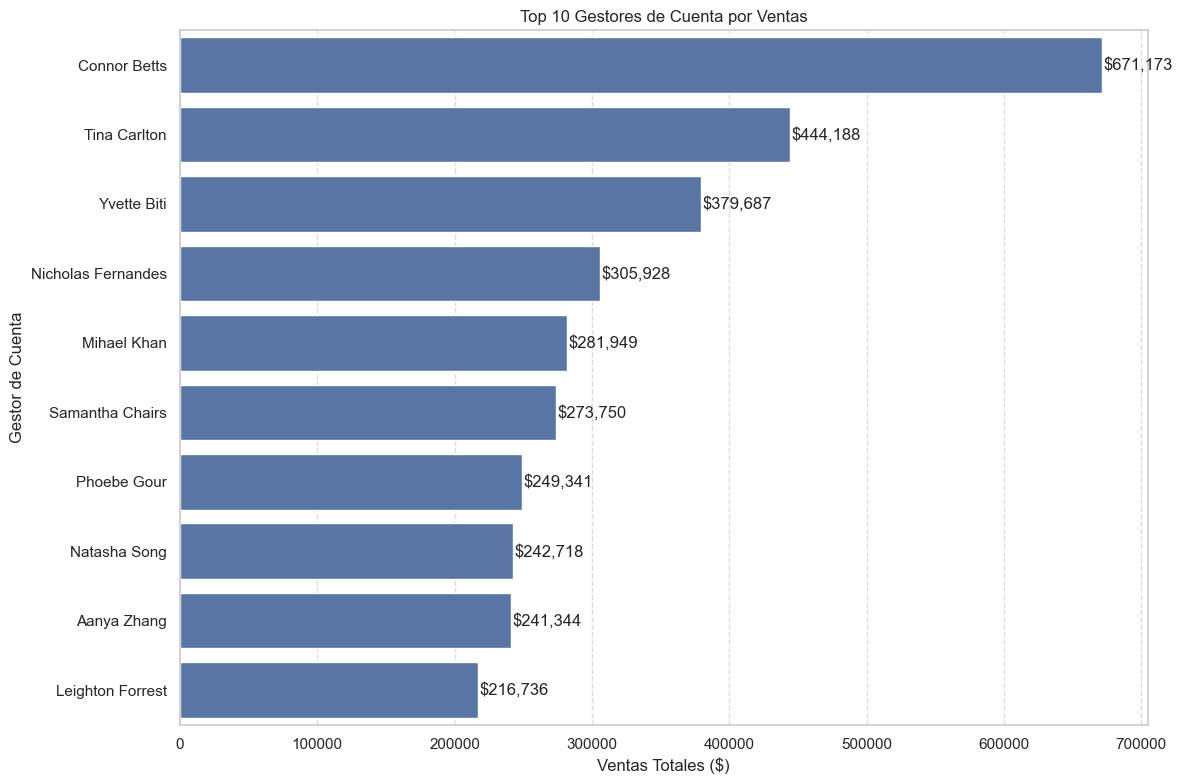

In [18]:
# Ventas por gestor de cuenta
ventas_gestor = df.groupby('Account Manager')['Total'].sum().reset_index()
ventas_gestor = ventas_gestor.sort_values('Total', ascending=False).head(10)

plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Total', y='Account Manager', data=ventas_gestor)
plt.title('Top 10 Gestores de Cuenta por Ventas')
plt.xlabel('Ventas Totales ($)')
plt.ylabel('Gestor de Cuenta')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Agregar etiquetas
for i, v in enumerate(ventas_gestor['Total']):
    ax.text(v + 1000, i, f'${v:,.0f}', va='center')

plt.tight_layout()
plt.show()

Modelo de Prediccion de Datos

In [19]:
# Eliminamos las columnas que no se utilizarán para el análisis. 
# Las mismas no son relevantes ni significativas para la ventas después de varios análisis realizados.

columnas_eliminar = ['Order No', 'City','State','Customer Name', 'Address']
df = df_modelo.drop(columns=columnas_eliminar)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Order Date         5000 non-null   datetime64[ns]
 1   Customer Type      5000 non-null   object        
 2   Account Manager    5000 non-null   object        
 3   Order Priority     5000 non-null   object        
 4   Product Name       5000 non-null   object        
 5   Product Category   5000 non-null   object        
 6   Product Container  5000 non-null   object        
 7   Ship Mode          5000 non-null   object        
 8   Ship Date          5000 non-null   datetime64[ns]
 9   Cost Price         5000 non-null   float64       
 10  Retail Price       5000 non-null   float64       
 11  Profit Margin      5000 non-null   float64       
 12  Order Quantity     4999 non-null   float64       
 13  Sub Total          5000 non-null   float64       
 14  Discount

In [21]:
# Extraemos los dias y meses de pedido y envio lo cual nos servirá para la estacionalidad próxima.
df['Order day'] = df['Order Date'].dt.weekday
df['Ship day'] = df['Ship Date'].dt.weekday
df['Order Month'] = df['Order Date'].dt.month
df['Ship Month'] = df['Ship Date'].dt.month
df['Order Year'] = df['Order Date'].dt.year
df['Ship Year'] = df['Ship Date'].dt.year

# Aplicamos One-hot encoding para las variables categoricas
df = pd.get_dummies(df, columns=['Ship day','Order day','Customer Type','Account Manager','Order Priority','Product Category','Product Container','Ship Mode', 'Order Year','Ship Year'])

In [22]:
# Eliminamos las siguiente columnas
df = df.drop(columns=['Order Date','Product Name','Ship Date'])
df.dropna(subset=list(df.columns), inplace=True)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4999 entries, 0 to 4999
Data columns (total 76 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Cost Price                          4999 non-null   float64
 1   Retail Price                        4999 non-null   float64
 2   Profit Margin                       4999 non-null   float64
 3   Order Quantity                      4999 non-null   float64
 4   Sub Total                           4999 non-null   float64
 5   Discount                            4999 non-null   int64  
 6   Total Discount                      4999 non-null   float64
 7   Order Total                         4999 non-null   float64
 8   Shipping Cost                       4999 non-null   float64
 9   Total                               4999 non-null   float64
 10  Order Month                         4999 non-null   int32  
 11  Ship Month                          4999 non-nul

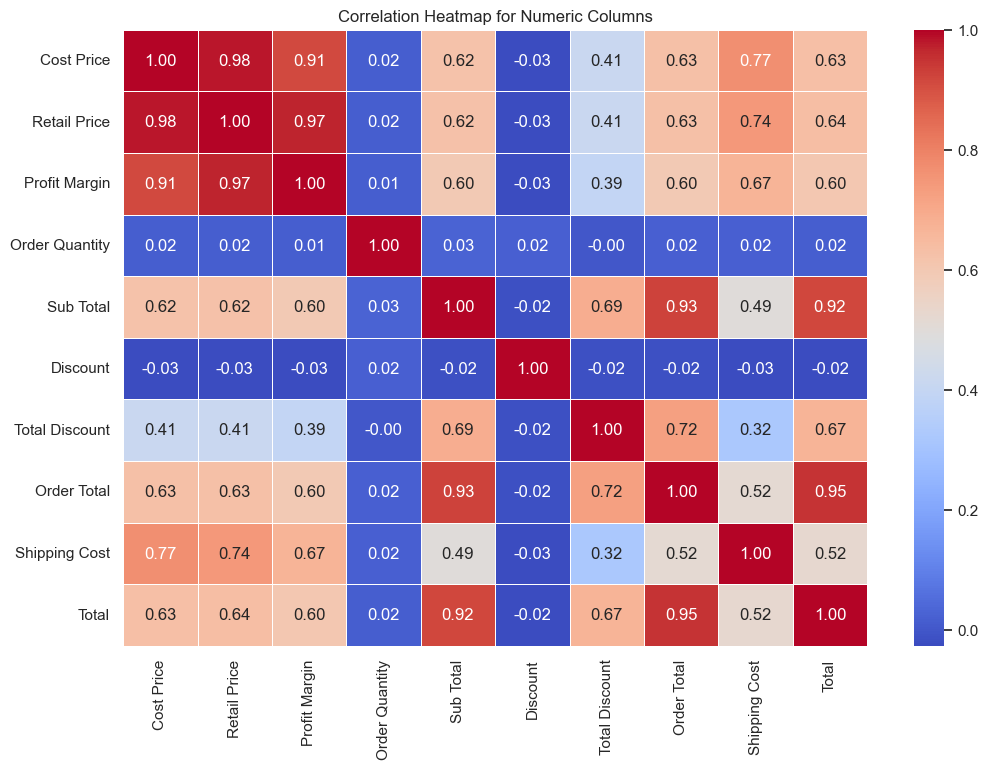

In [24]:
variables_numericas = ['Cost Price', 'Retail Price', 'Profit Margin', 'Order Quantity', 'Sub Total', 'Discount', 'Total Discount', 'Order Total', 'Shipping Cost', 'Total']
correlation_matrix = df[variables_numericas].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap for Numeric Columns")
plt.show()

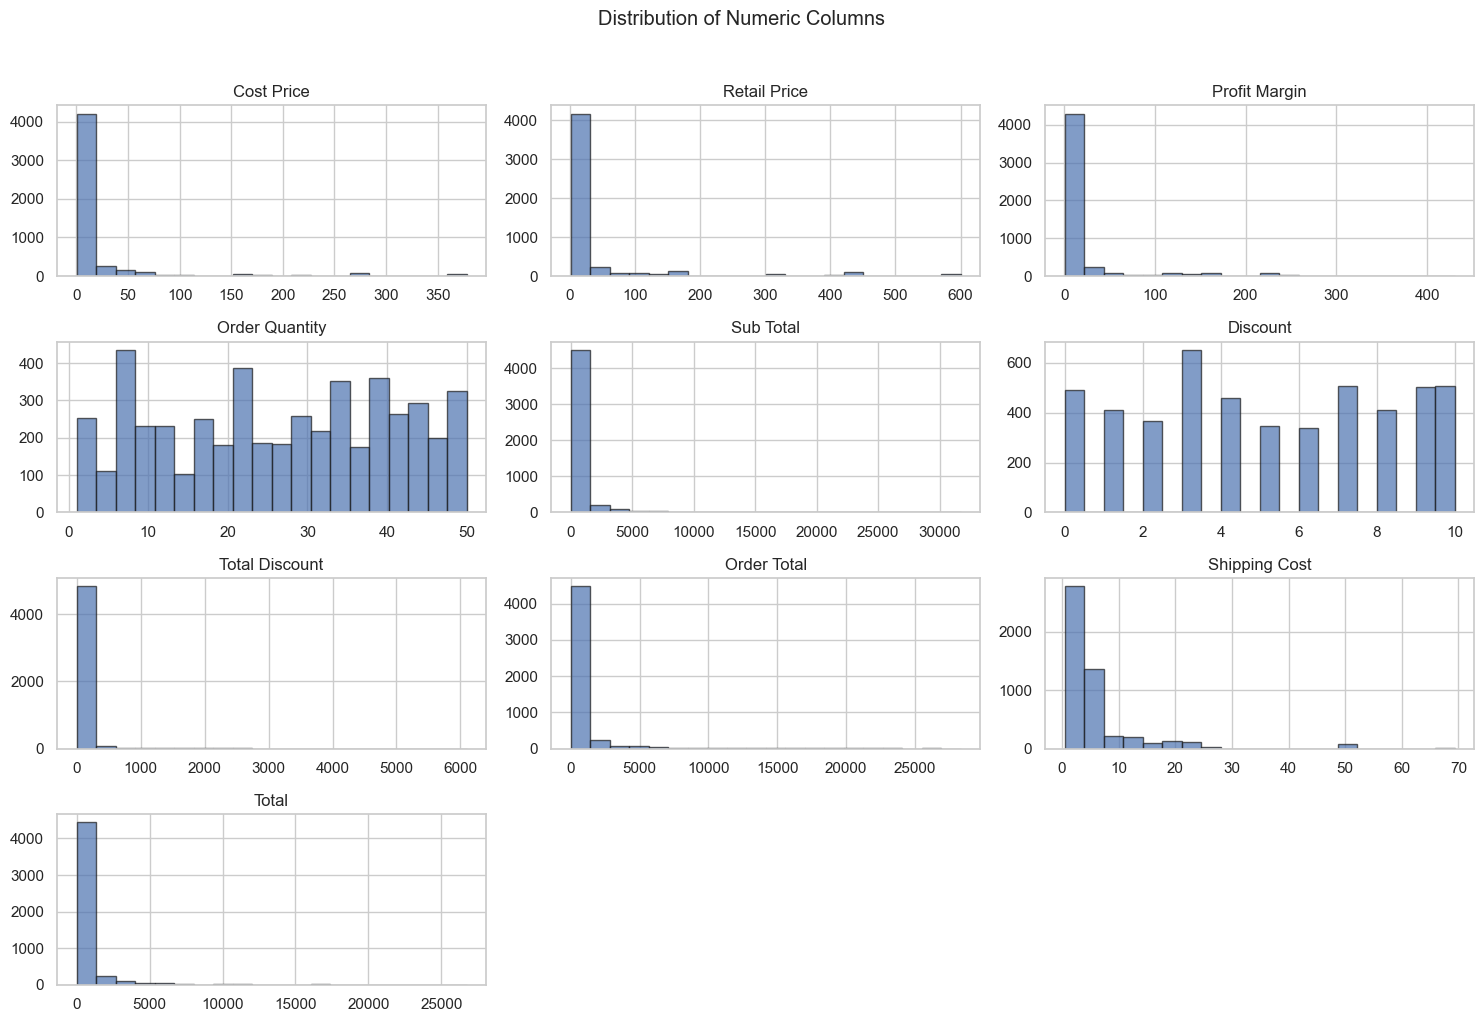

In [25]:
df[variables_numericas].hist(figsize=(15, 10), bins=20, edgecolor='k', alpha=0.7)
plt.suptitle("Distribution of Numeric Columns", y=1.02)
plt.tight_layout()
plt.show()

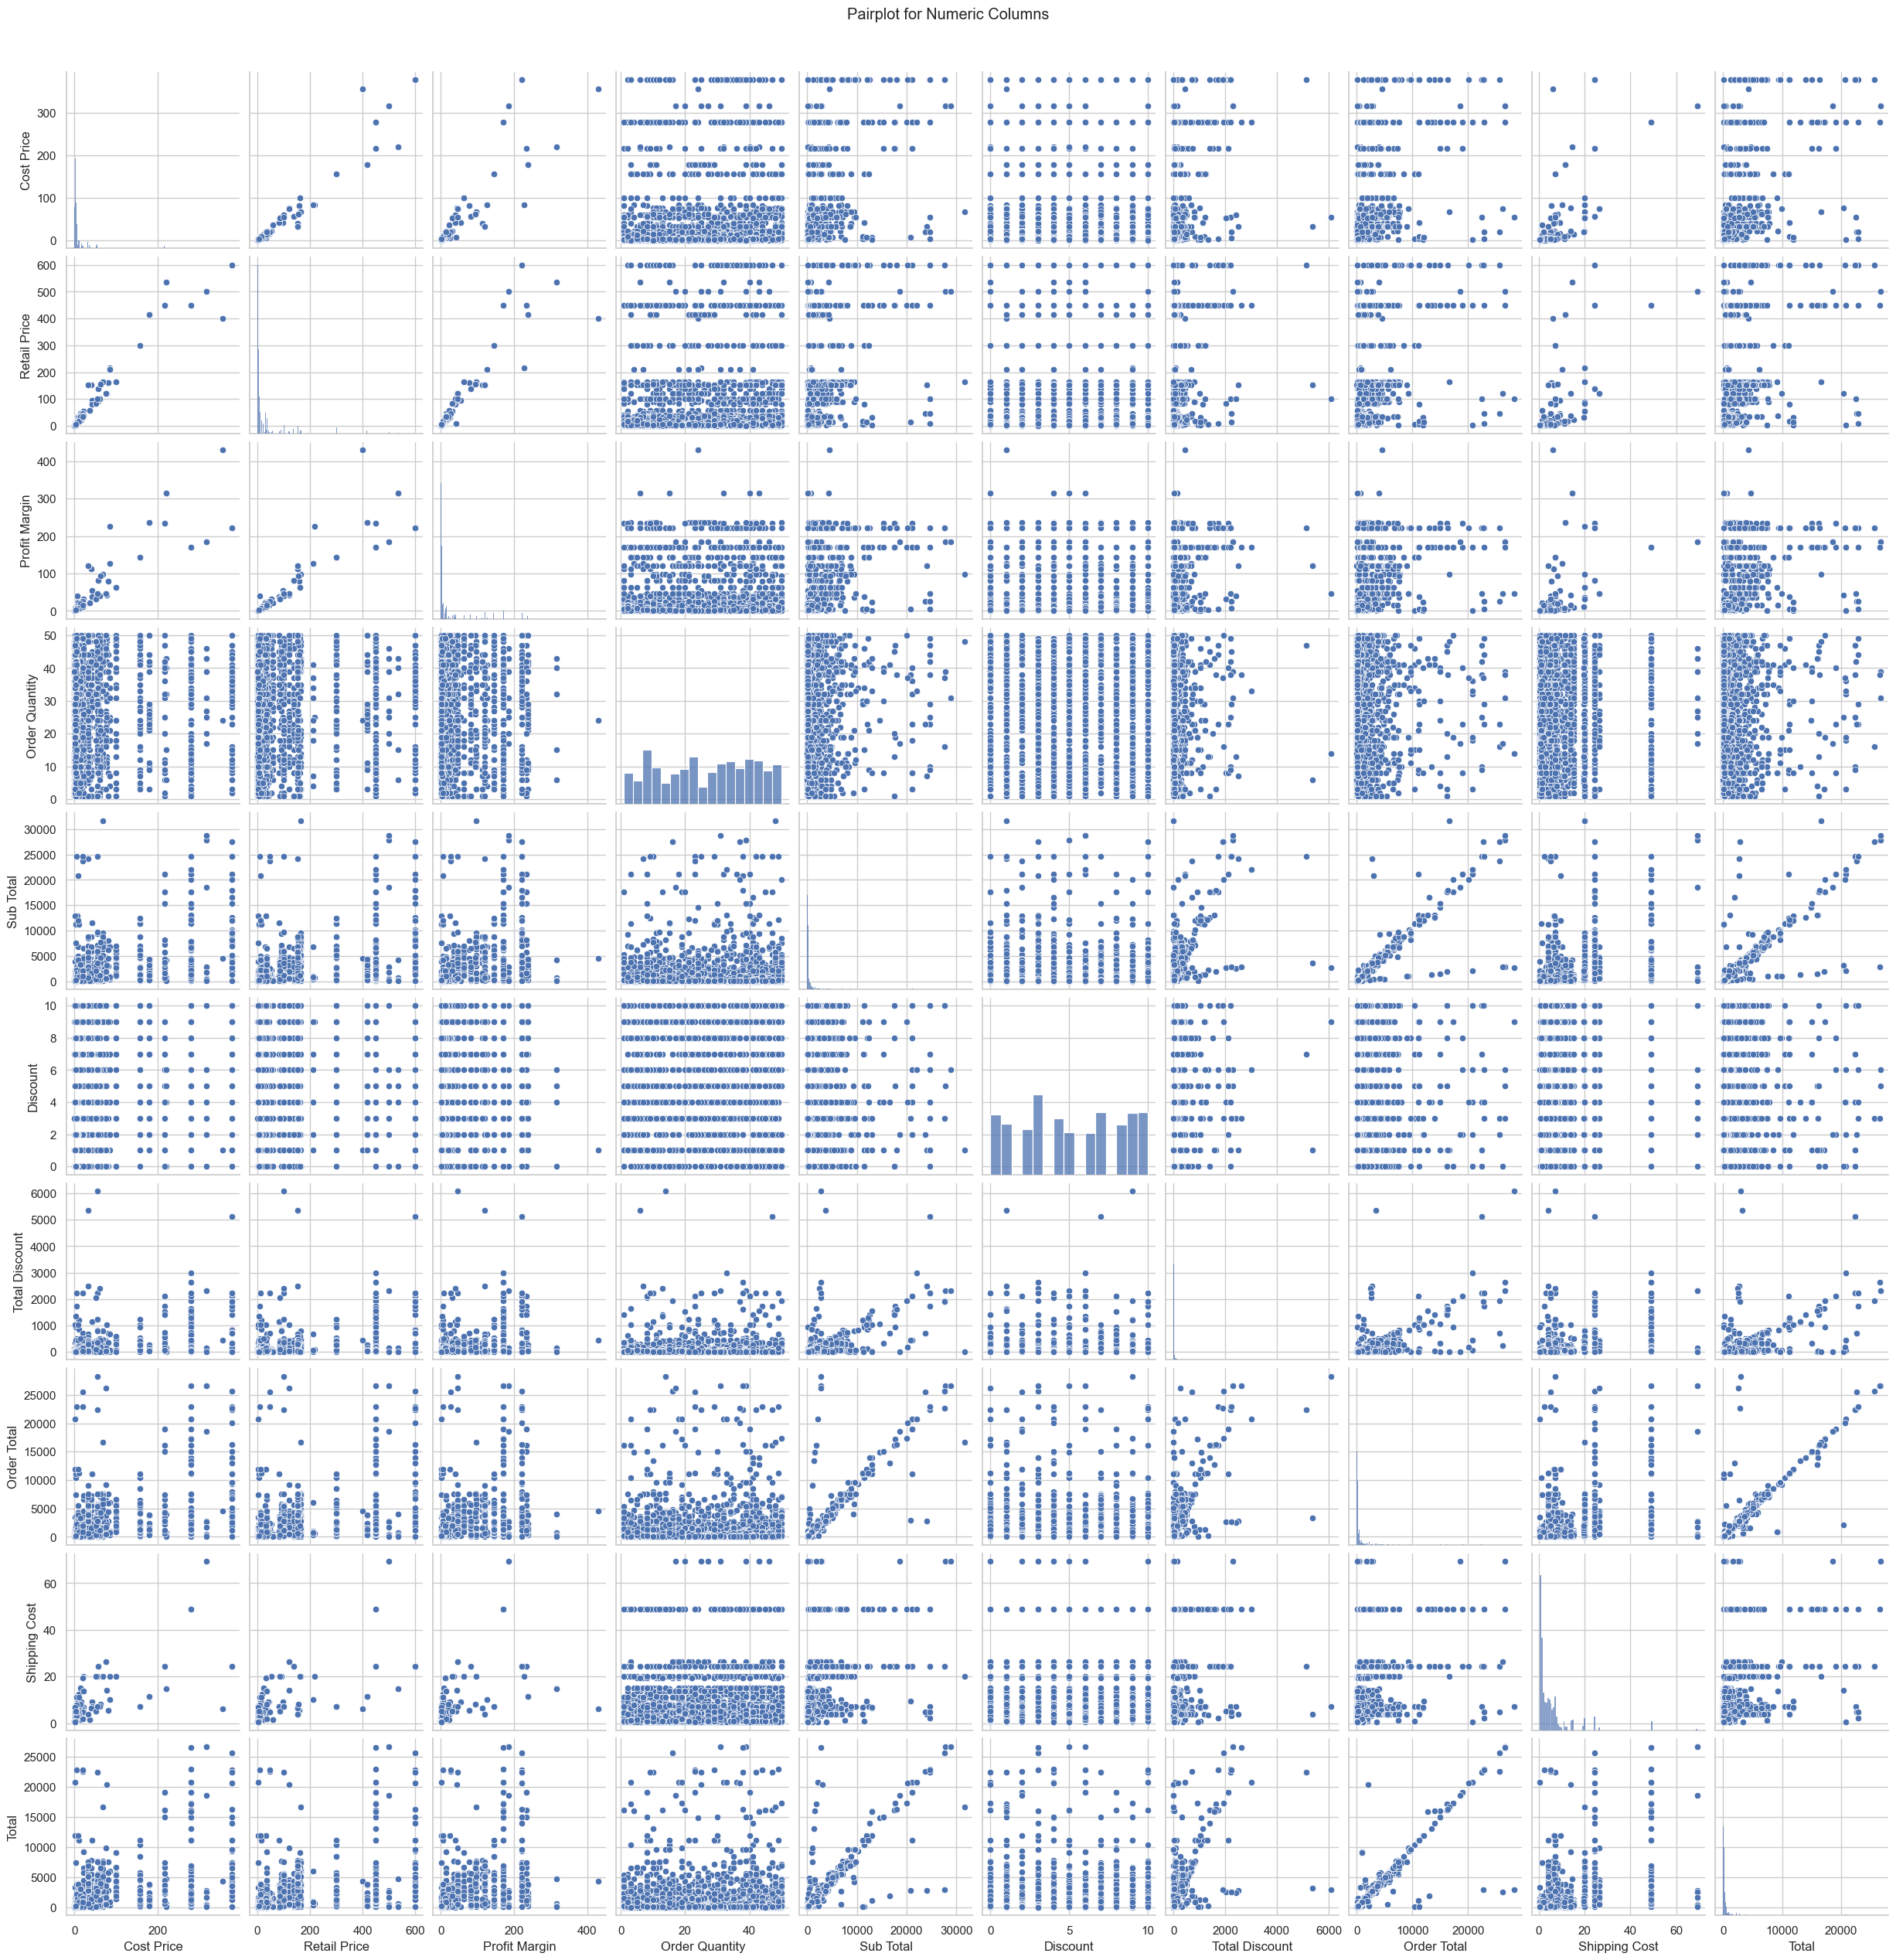

In [26]:
sns.pairplot(df[variables_numericas])
plt.suptitle("Pairplot for Numeric Columns", y=1.02)
plt.show()

In [27]:
scaler = StandardScaler()
variables_numericas = ['Cost Price', 'Retail Price', 'Profit Margin', 'Order Quantity', 'Sub Total', 'Discount', 'Total Discount', 'Order Total', 'Shipping Cost', 'Total']
df[variables_numericas] = scaler.fit_transform(df[variables_numericas])

X = df.drop('Total',axis=1)
y = df['Total']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Calcular el MAPE (Mean Absolute Percentage Error)
def mpe_porc(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    # Evitar división por cero
    mask = y_true != 0
    return np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100

mape = mpe_porc(y_test, y_pred)

# Calcular RMSE (Raíz del Error Cuadrático Medio)
rmse = np.sqrt(mse)

print(f'Error Cuadrático Medio (MSE): {mse:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'R-cuadrado: {r2:.4f}')
print(f'Error Porcentual Absoluto Medio (MAPE): {mape:.2f}%')

Error Cuadrático Medio (MSE): 0.0614
RMSE: 0.2477
R-cuadrado: 0.9341
Error Porcentual Absoluto Medio (MAPE): 10.05%


Los resultados obtenidos 
- R²: 0.9341 
- MAPE: 10.05% 
- MSE: 0.0614 
- RMSE: 0.2477 

Indican un buen rendimiento del modelo predictivo. El R² de 0.93 demuestra que el modelo explica más del 93% de la variabilidad en la rentabilidad de las ventas, lo que sugiere una capacidad predictiva sólida. 

El MAPE de aproximadamente 10% significa que, en promedio, las predicciones tienen una desviación del 10% respecto a los valores reales, un nivel de precisión aceptable. 

Por último, nuestos MSE y RMSE indican errores de predicción bajos

In [29]:
import pickle

# Guardar el modelo en un archivo
with open('modelo_random_forest.pkl', 'wb') as archivo:
    pickle.dump(model, archivo)

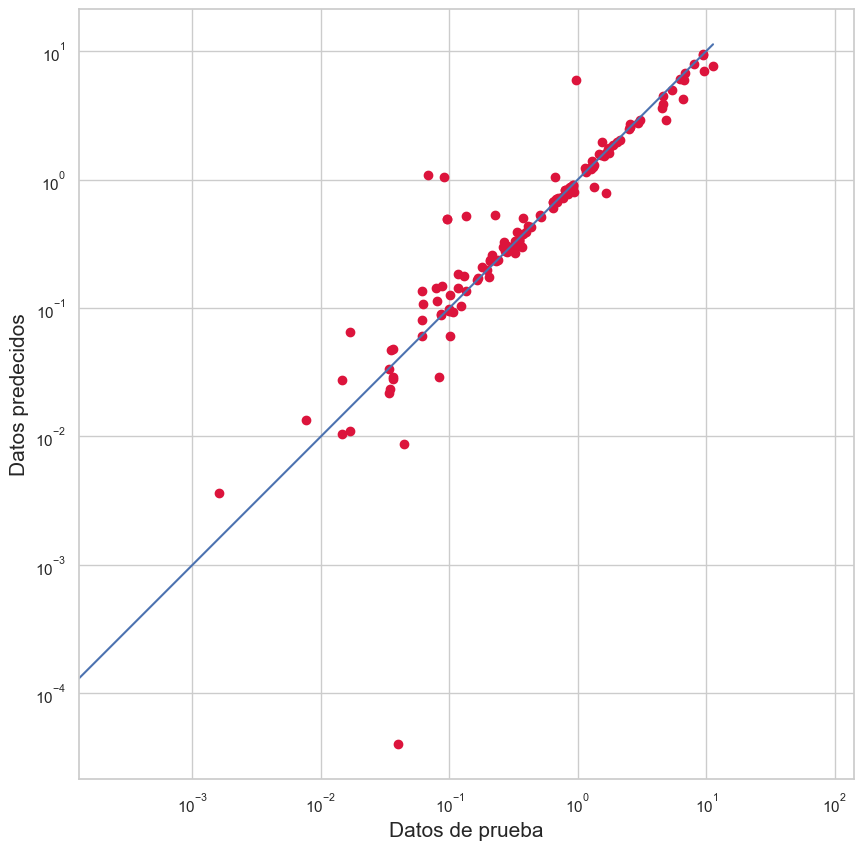

In [30]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Datos de prueba', fontsize=15)
plt.ylabel('Datos predecidos', fontsize=15)
plt.axis('equal')
plt.show()

Ventas mensuales - Min: $15468.78, Max: $196110.35, Media: $76153.80

Predicciones generadas para los próximos 6 meses:
Mes       Total          Tendencia      Estacionalidad 
-------------------------------------------------------
2017-03   $67620.06      $76603.94      $-15323.65     
2017-04   $103106.13     $76439.98      $-28511.98     
2017-05   $119681.26     $76276.01      $29467.81      
2017-06   $71714.96      $76112.05      $15825.93      
2017-07   $63402.87      $75948.09      $-36346.58     
2017-08   $70926.14      $75784.13      $-2442.16      

Media de ventas mensuales históricas: $76153.80
Media de predicciones (Random Forest): $82741.90 (108.7% del histórico)

Se han guardado las predicciones y gráficos correctamente.


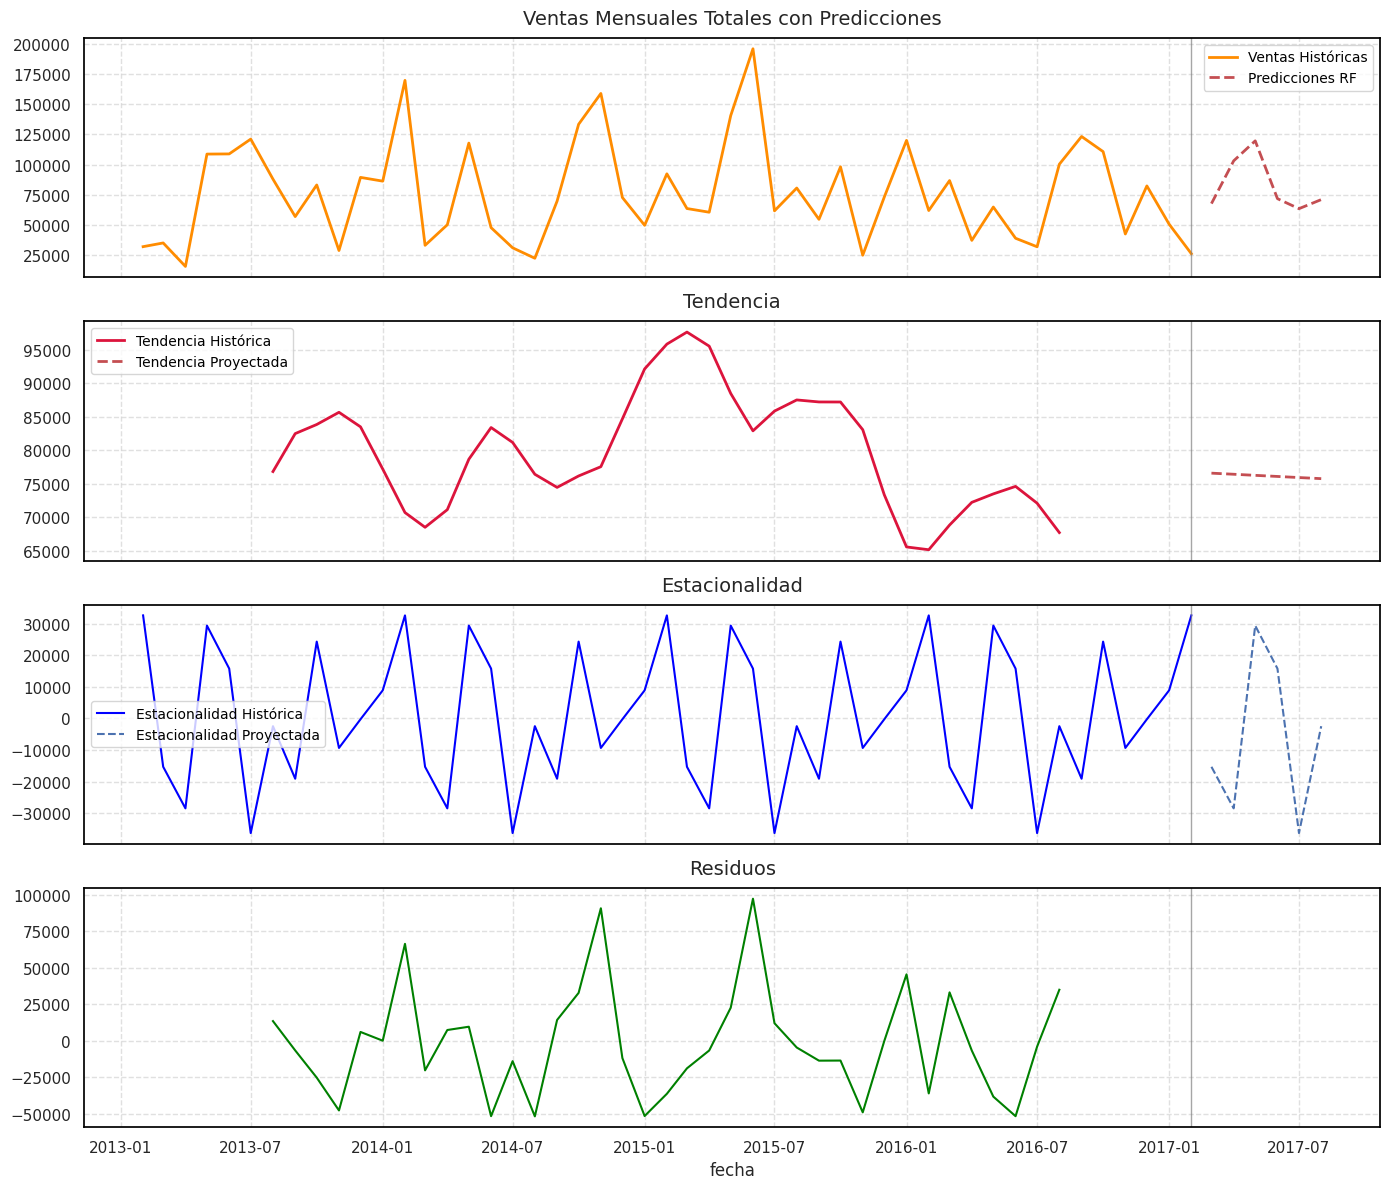

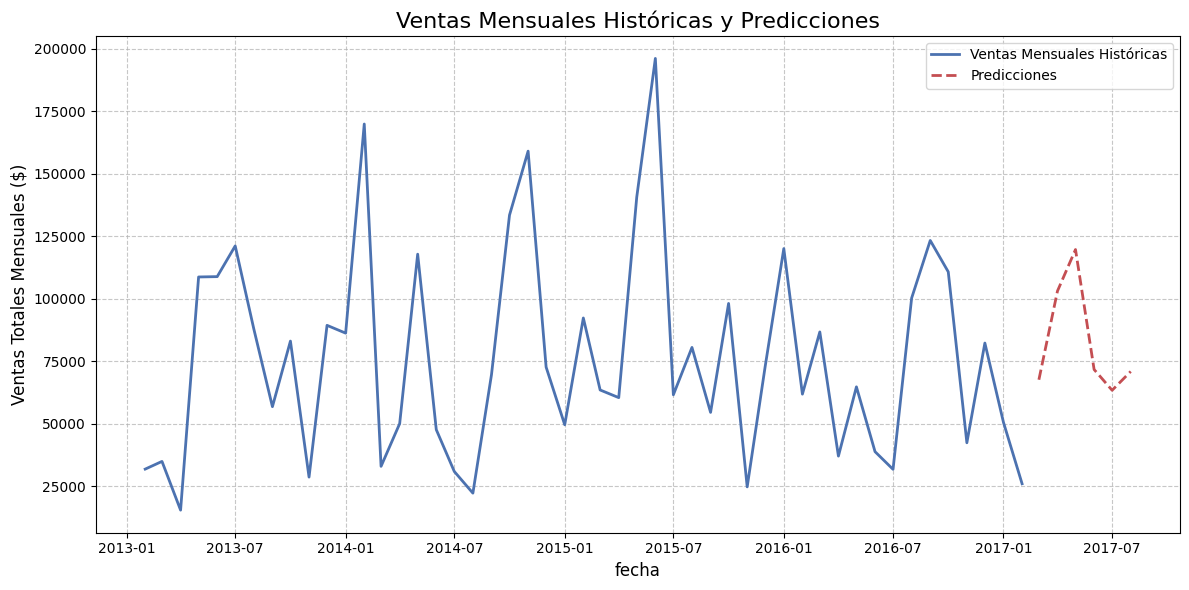

In [31]:
# 1. PREPARACIÓN DE DATOS PARA ANÁLISIS DE SERIES TEMPORALES
# ----------------------------------------------------------

# Asegurarse que las fechas están en formato datetime
df_graficas['Order Date'] = pd.to_datetime(df_graficas['Order Date'])

# Agregar datos por mes
df_graficas['periodo_mes'] = df_graficas['Order Date'].dt.to_period('M')
ventas_mensuales = df_graficas.groupby('periodo_mes').agg({
    'Total': 'sum',
    'Order Quantity': 'sum',
    'Sub Total': 'sum',
    'Discount': 'mean',
    'Total Discount': 'sum',
    'Order Total': 'sum',
    'Shipping Cost': 'sum'
}).reset_index()

# Convertir el período a fecha para gráficos
ventas_mensuales['fecha'] = ventas_mensuales['periodo_mes'].dt.to_timestamp()
ventas_mensuales = ventas_mensuales.sort_values('fecha')

# Crear serie temporal
serie_temporal = pd.Series(ventas_mensuales['Total'].values, index=ventas_mensuales['fecha'])

# Imprimir estadísticas para verificar
print(f"Ventas mensuales - Min: ${ventas_mensuales['Total'].min():.2f}, "
      f"Max: ${ventas_mensuales['Total'].max():.2f}, "
      f"Media: ${ventas_mensuales['Total'].mean():.2f}")

# 2. MODELADO DE SERIES TEMPORALES DIRECTAMENTE
# --------------------------------------------

# Obtener la última fecha disponible
ultima_fecha = ventas_mensuales['fecha'].max()
fechas_futuras = [ultima_fecha + pd.DateOffset(months=i) for i in range(1, 7)]

# Crear características para el modelo de series temporales
# Usamos los últimos 24 meses para predecir los próximos 6 meses
X_serie_temporal = []
y_serie_temporal = []

# Número de meses a considerar para la predicción
meses_retrospectivos = min(24, len(ventas_mensuales) - 1)

for i in range(meses_retrospectivos, len(ventas_mensuales)):
    # Características: valores de los últimos meses_retrospectivos meses
    caracteristicas = ventas_mensuales['Total'].iloc[i-meses_retrospectivos:i].values
    X_serie_temporal.append(caracteristicas)
    # Objetivo: valor del mes actual
    y_serie_temporal.append(ventas_mensuales['Total'].iloc[i])

X_serie_temporal = np.array(X_serie_temporal)
y_serie_temporal = np.array(y_serie_temporal)

# Entrenamos al modelo con los datos reales
modelo_serie_temporal = model.fit(X_serie_temporal, y_serie_temporal)

# Generar predicciones para los próximos 6 meses
predicciones_futuras = []
ultima_secuencia = ventas_mensuales['Total'].iloc[-meses_retrospectivos:].values

for _ in range(len(fechas_futuras)):
    # Predecir el siguiente mes
    siguiente_pred = modelo_serie_temporal.predict([ultima_secuencia])[0]
    predicciones_futuras.append(siguiente_pred)
    
    # Actualizar la secuencia para la siguiente predicción
    ultima_secuencia = np.append(ultima_secuencia[1:], siguiente_pred)

# Crear DataFrame con las predicciones
resultados_prediccion = pd.DataFrame({
    'fecha': fechas_futuras,
    'periodo_mes': [pd.Period(fecha, freq='M') for fecha in fechas_futuras],
    'Total_Predicho': predicciones_futuras
})

# 3. REALIZAR DESCOMPOSICIÓN DE LA SERIE TEMPORAL
# -----------------------------------------------
try:
    # Determinar el periodo adecuado
    periodo = min(12, len(serie_temporal) // 2)
    
    if len(serie_temporal) >= periodo * 2:
        descomposicion = seasonal_decompose(serie_temporal, model='additive', period=periodo)
        
        # Obtener componentes
        tendencia = descomposicion.trend
        estacionalidad = descomposicion.seasonal
        residual = descomposicion.resid
        
        # Generar predicciones para tendencia y estacionalidad
        fechas_tendencia = tendencia.index.to_numpy().astype(np.int64)
        valores_tendencia = tendencia.values
        # Eliminar NaN al principio y final de la tendencia
        idx_validos = ~np.isnan(valores_tendencia)
        fechas_tendencia = fechas_tendencia[idx_validos]
        valores_tendencia = valores_tendencia[idx_validos]
        
        # Se hace ajuste de la tendencia
        z = np.polyfit(range(len(fechas_tendencia)), valores_tendencia, 1)
        modelo_tendencia = np.poly1d(z)
        
        # Predecir tendencia futura
        fechas_tendencia_futuras = [fecha.to_numpy().astype(np.int64) for fecha in resultados_prediccion['fecha']]
        idx_tendencia_futura = np.arange(len(fechas_tendencia), len(fechas_tendencia) + len(fechas_futuras))
        tendencia_futura = modelo_tendencia(idx_tendencia_futura)
        
        # Para estacionalidad, se usaran los patrones de estacionalidad de los ultimos años
        patron_estacional = estacionalidad.values[-periodo:]
        
        # Repetir el patrón estacional para los meses futuros
        estacionalidad_futura = np.tile(patron_estacional, int(np.ceil(len(fechas_futuras) / periodo)))[:len(fechas_futuras)]
        
        # Guardar componentes en el DataFrame de predicciones
        resultados_prediccion['Tendencia'] = tendencia_futura
        resultados_prediccion['Estacionalidad'] = estacionalidad_futura
        
        # 4. VISUALIZACIÓN DE LA DESCOMPOSICIÓN
        # ------------------------------------------------
        fig, ejes = plt.subplots(4, 1, figsize=(14, 12), sharex=True)
        
        # Configurar estilo con fondo blanco
        plt.style.use('default')
        
        # Configuración para todos los subgráficos
        for eje in ejes:
            eje.set_facecolor('white')
            eje.grid(True, linestyle='--', alpha=0.7, color='lightgray')
            for borde in eje.spines.values():
                borde.set_color('black')
        
        # Gráfico 1: Serie original + predicciones
        ejes[0].plot(serie_temporal.index, serie_temporal.values, color='darkorange', linewidth=2, label='Ventas Históricas')
        ejes[0].plot(resultados_prediccion['fecha'], resultados_prediccion['Total_Predicho'], 
                    'r--', linewidth=2, label='Predicciones RF')
        ejes[0].set_title('Ventas Mensuales Totales con Predicciones', fontsize=14, pad=10)
        ejes[0].legend(loc='best')
        
        # Gráfico 2: Componente de tendencia con predicción
        ejes[1].plot(tendencia.index, tendencia.values, color='crimson', linewidth=2, label='Tendencia Histórica')
        ejes[1].plot(resultados_prediccion['fecha'], resultados_prediccion['Tendencia'], 
                   'r--', linewidth=2, label='Tendencia Proyectada')
        ejes[1].set_title('Tendencia', fontsize=14, pad=10)
        ejes[1].legend(loc='best')
        
        # Gráfico 3: Componente estacional con predicción
        ejes[2].plot(estacionalidad.index, estacionalidad.values, color='blue', linewidth=1.5, label='Estacionalidad Histórica')
        ejes[2].plot(resultados_prediccion['fecha'], resultados_prediccion['Estacionalidad'], 
                   'b--', linewidth=1.5, label='Estacionalidad Proyectada')
        ejes[2].set_title('Estacionalidad', fontsize=14, pad=10)
        ejes[2].legend(loc='best')
        
        # Gráfico 4: Residuos
        ejes[3].plot(residual.index, residual.values, color='green', linewidth=1.5)
        ejes[3].set_title('Residuos', fontsize=14, pad=10)
        
        # Configurar etiquetas del eje X
        ejes[3].set_xlabel('fecha', fontsize=12)
        formato_años = mdates.DateFormatter('%Y-%m')
        ejes[3].xaxis.set_major_formatter(formato_años)
        
        # Añadir línea vertical para separar datos históricos y predicciones
        for eje in ejes:
            eje.axvline(x=ultima_fecha, color='gray', linestyle='-', linewidth=1, alpha=0.7)
        
        # Ajustar distribución
        plt.tight_layout()
        
        # Guardar figura
        plt.savefig('prediccion_descomposicion_componentes.png', dpi=300, bbox_inches='tight', facecolor='white')
    
    else:
        print("No hay suficientes datos para descomposición estacional.")
except Exception as e:
    print(f"Error en el análisis de descomposición: {e}")

# 5. GRÁFICO PRINCIPAL SIMPLIFICADO
# -------------------------------------------------------------------
plt.figure(figsize=(12, 6))
plt.plot(ventas_mensuales['fecha'], ventas_mensuales['Total'], 'b-', linewidth=2, label='Ventas Mensuales Históricas')
plt.plot(resultados_prediccion['fecha'], resultados_prediccion['Total_Predicho'], 'r--', linewidth=2, label='Predicciones')
plt.title('Ventas Mensuales Históricas y Predicciones', fontsize=16)
plt.xlabel('fecha', fontsize=12)
plt.ylabel('Ventas Totales Mensuales ($)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()

# Guardar gráfico simplificado
plt.savefig('predicciones_ventas_mensuales_final.png', dpi=300, bbox_inches='tight')

# 6. MOSTRAR RESULTADOS DE PREDICCIONES
# ------------------------------------
print("\nPredicciones generadas para los próximos 6 meses:")
print(f"{'Mes':<10}{'Total':<15}{'Tendencia':<15}{'Estacionalidad':<15}")
print('-' * 55)
for i, fila in resultados_prediccion.iterrows():
    mes = fila['fecha'].strftime('%Y-%m')
    predicho = f"${fila['Total_Predicho']:.2f}"
    tendencia = f"${fila['Tendencia']:.2f}" if 'Tendencia' in fila else "N/A"
    estacional = f"${fila['Estacionalidad']:.2f}" if 'Estacionalidad' in fila else "N/A"
    print(f"{mes:<10}{predicho:<15}{tendencia:<15}{estacional:<15}")

# Comparación de predicciones
media_rf = resultados_prediccion['Total_Predicho'].mean()
media_hist = ventas_mensuales['Total'].mean()
    
print(f"\nMedia de ventas mensuales históricas: ${media_hist:.2f}")
print(f"Media de predicciones (Random Forest): ${media_rf:.2f} ({media_rf/media_hist*100:.1f}% del histórico)")

# Guardar resultados en CSV
resultados_prediccion.to_csv('predicciones_ventas_mensuales.csv', index=False)

print("\nSe han guardado las predicciones y gráficos correctamente.")